<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/9.%20%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%B0.%20%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%20%E2%84%9612.%20%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

Датасет: [Russian Jokes](https://www.kaggle.com/datasets/konstantinalbul/russian-jokes)

## Загрузите датасет

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import multiprocessing
import pandas as pd
import numpy as np
import re
from time import time


file_path = './notebooks/data/russian_jokes/jokes.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,theme,text,rating
0,pro-sudey,На суде в Стамбуле обвиняемый сказал:\r\n- На...,5
1,pro-sudey,"- Вы продолжаете утверждать, что обвиняемый н...",4
2,pro-sudey,"На суде.\r\n- Итак, когда дело дошло до столкн...",0
3,pro-sudey,Старую леди сбил автомобиль. На суде ее спраши...,4
4,pro-sudey,"Судья говорит:\r\n- Согласно вашей жалобе, об...",2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130204 entries, 0 to 130203
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   theme   130204 non-null  object
 1   text    130204 non-null  object
 2   rating  130204 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.0+ MB


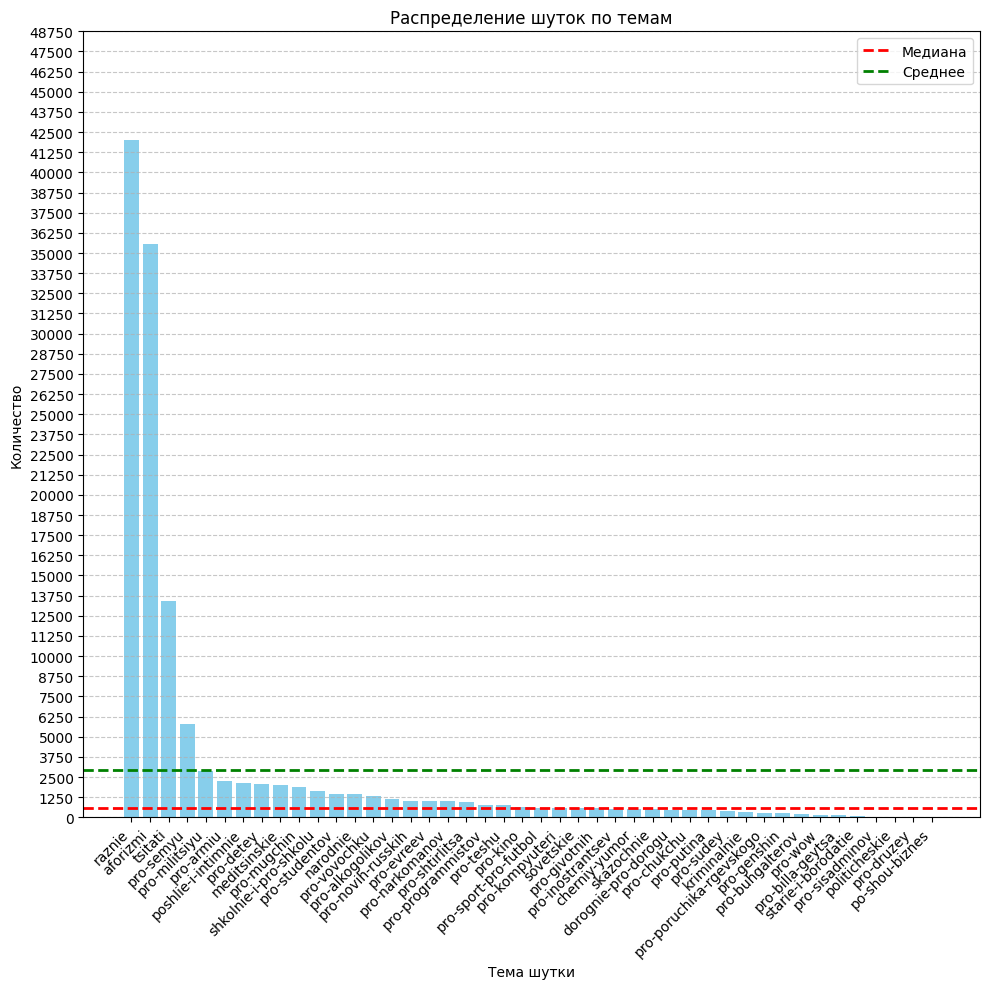

In [6]:
topic_counts = df.theme.value_counts()
median_value = topic_counts.median()
mean_value = topic_counts.mean()

fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(x=list(topic_counts.index), height=topic_counts.values, color='skyblue')
plt.axhline(median_value, color='red', linestyle='dashed', linewidth=2, label='Медиана')
plt.axhline(mean_value, color='green', linestyle='dashed', linewidth=2, label='Среднее')
plt.title('Распределение шуток по темам')
plt.xlabel('Тема шутки')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 50000, 1250))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.legend()
plt.show()

Возмём все шутки, количество которых находится между медианой и средним. Уберём некоторые темы

In [7]:
allowed_topics = list(topic_counts \
    .where(lambda x: x < mean_value) \
    .where(lambda x: x > median_value) \
    .dropna() \
    .index)

allowed_topics.remove('poshlie-i-intimnie')
data = df[df.theme.isin(allowed_topics)]
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Zа-яА-ЯёЁ]', ' ', str(x)))

/tmp/ipykernel_487922/3930332493.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Zа-яА-ЯёЁ]', ' ', str(x)))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


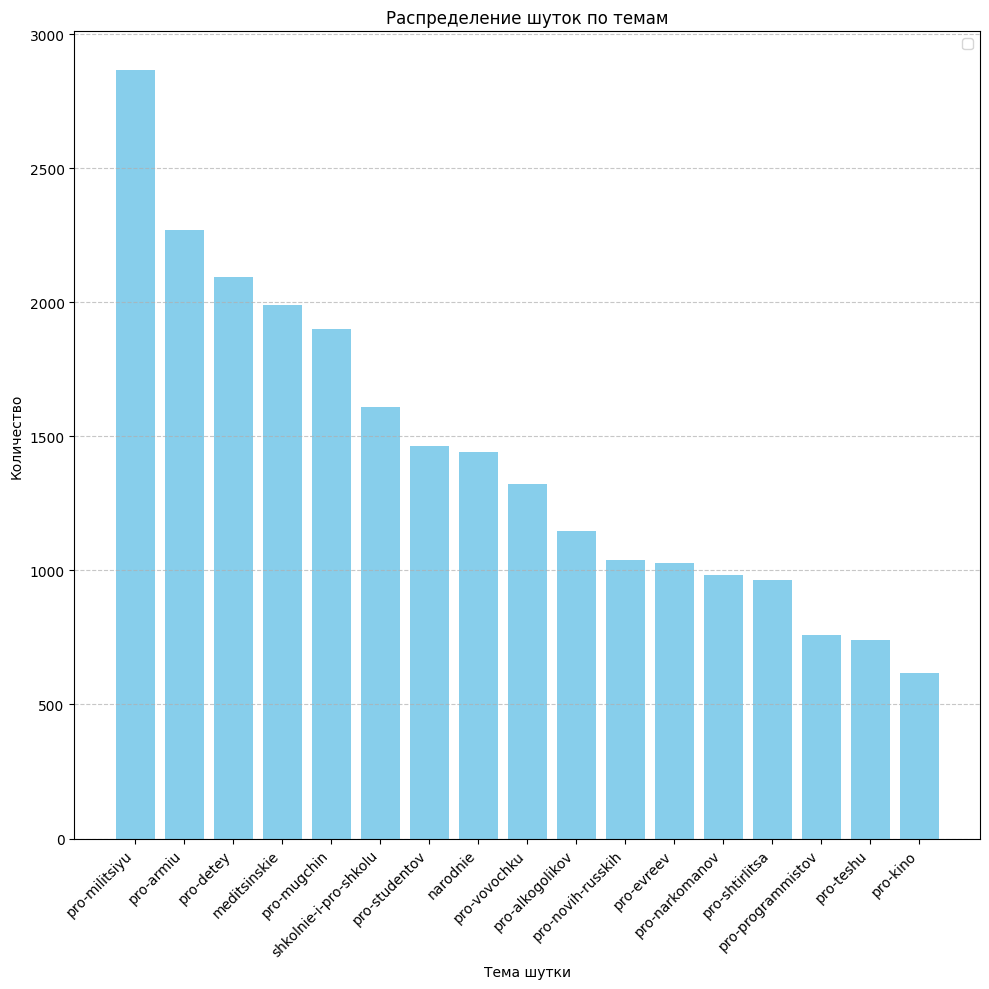

In [8]:
new_topic_counts = data.theme.value_counts()

fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(x=list(new_topic_counts.index), height=new_topic_counts.values, color='skyblue')
plt.title('Распределение шуток по темам')
plt.xlabel('Тема шутки')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.legend()
plt.show()

## Разделите данные на обучающую и валидационную выборки

In [9]:
from sklearn.model_selection import train_test_split
X = data['text']
y = data['theme']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## При выполении дальнейших заданий поэксперементируйте с методами векторизации текста:


1. [Bag of Words](https://habr.com/ru/companies/mlclass/articles/270591/) (BOW): Bag of Words представляет текст как вектор, где каждый элемент обозначает количество вхождений конкретного слова в тексте. Процесс включает в себя создание словаря всех уникальных слов в корпусе текстов и подсчет частоты встречаемости каждого слова в отдельных текстах.

2. [TF-IDF](https://habr.com/ru/companies/otus/articles/755772/) (Term Frequency-Inverse Document Frequency): TF-IDF учитывает не только количество вхождений слова в текст, но и частоту его встречаемости в других текстах. Он вычисляет вес слова, умножая его частоту встречаемости (term frequency) на обратную частоту документа (inverse document frequency). Это позволяет снизить вес наиболее часто встречающихся слов, которые могут быть менее информативными.

3. Word Embeddings (например, [Word2Vec](https://habr.com/ru/articles/446530/) и [GloVe](https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6)): Word Embeddings используют нейронные сети для создания векторных представлений слов, которые учитывают семантическую близость между словами. Нейронные сети обучаются на больших текстовых корпусах и захватывают семантические отношения между словами, что позволяет представить слова в векторном пространстве.

4. One-Hot Encoding: One-Hot Encoding преобразует каждое слово в уникальный вектор, где все элементы равны нулю, за исключением одного, который равен единице. Каждый вектор соответствует отдельному слову и используется для представления его в пространстве признаков.

5. [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Count Vectorizer подсчитывает количество раз, которое каждое слово встречается в тексте. Он создает вектор, в котором каждый элемент соответствует количеству вхождений конкретного слова в текст.

6. [Hashing Vectorizer](https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/): Hashing Vectorizer преобразует каждое слово в уникальный числовой идентификатор с помощью хеширования. Он использует хеш-функцию для преобразования слова в числовое значение, которое затем используется в векторном представлении.

7. [Doc2Vec](https://habr.com/ru/articles/599513/): Doc2Vec является расширением метода Word2Vec и позволяет получить векторное представление не только отдельных слов, но и целых документов или текстов. Алгоритм обучает нейронную сеть, которая учитывает контекст и порядок слов в предложении, чтобы получить векторное представление документа. Это позволяет сравнивать и измерять семантическую близость между целыми текстовыми документами.

In [12]:
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

  Obtaining dependency information for scikit-learn-intelex from https://files.pythonhosted.org/packages/64/b8/2b818c5151ecedd837ecd4691c31a71abae22cf416689c27619751b65360/scikit_learn_intelex-2024.0.1-py311-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for daal4py==2024.0.1 from https://files.pythonhosted.org/packages/50/fa/ff70311945bbf6946f36bcdd9ceee0e280f530253b77c587298accc6d916/daal4py-2024.0.1-py311-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for daal==2024.0.1 from https://files.pythonhosted.org/packages/d7/c2/c5db19d1fb59641209499e87b0bcdb09e8f380cb9cda6babe1da05943714/daal-2024.0.1-py2.py3-none-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for tbb==2021.* from https://files.pythonhosted.org/packages/31/fc/eeb2ab19f26e608bda910350b6f0a06e8dd1b472049b175ca36df93c81ff/tbb-2021.11.0-py2.py3-none-manylinux1_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 1.5 MB/s eta 0:00:00a 0:

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## For Bag Of Words

In [13]:
from collections import Counter

def bag_of_words(tokens):
  return Counter(tokens)

X_train_bag = X_train.copy()
X_valid_bag = X_valid.copy()

X_train_bag = X_train.apply(lambda tokens: bag_of_words(tokens))
X_valid_bag = X_valid.apply(lambda tokens: bag_of_words(tokens))

## For Word2Vec

In [14]:
!pip install gensim

  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/22/40/7d2cce3ad4ad5d02aa68e253e6ea5f0acc381f02f594e235fe00a274faff/gensim-4.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for smart-open>=1.8.1 from https://files.pythonhosted.org/packages/fc/d9/d97f1db64b09278aba64e8c81b5d322d436132df5741c518f3823824fae0/smart_open-6.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 26.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 15.2 MB/s eta 0:00:00


In [15]:
from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

X_w2v_model = Word2Vec(workers=cores)
X_w2v_model.build_vocab(X, progress_per=10000)

In [16]:
X_w2v_model.train(X, total_examples=X_w2v_model.corpus_count, epochs=30, report_delay=1)

(39690273, 184992660)

In [17]:
import numpy as np
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [X_w2v_model.wv[word] for word in words if word in X_w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_w2v_train = np.array([vectorize(sentence) for sentence in X_train])
X_w2v_test = np.array([vectorize(sentence) for sentence in X_valid])

# Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [19]:
from dataclasses import dataclass

models = dict()

@dataclass
class ModelReport:
    model: object
    vect_type: str
    accuracy: float
    precision: float
    recall: float
    f1_score: float
    conf_matrix: object

def judge_model(model, predictions, y_valid, vect_name, model_reports):
    accuracy_model = accuracy_score(y_valid, predictions)
    precision_model = precision_score(y_valid, predictions, average='weighted')
    recall_model = recall_score(y_valid, predictions, average='weighted')
    f1_model = f1_score(y_valid, predictions, average='weighted')
    conf_matrix = confusion_matrix(y_valid, predictions)

    report = classification_report(y_valid, predictions)
    print("Classification Report:")
    print(report)

    model_reports[vect_name] = ModelReport(
        model=model,
        vect_type=vect_name,
        accuracy=accuracy_model,
        precision=precision_model,
        recall=recall_model,
        f1_score=f1_model,
        conf_matrix=conf_matrix
    )

In [20]:
def plot_model_report(model_report: ModelReport):
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(
        confusion_matrix=model_report.conf_matrix, 
        display_labels=allowed_topics,
    )
    disp.plot(xticks_rotation='vertical')
    plt.title(f'Матрица ошибок: {model_report.vect_type}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [21]:
def print_accuracy(model_report: ModelReport):
    data = {
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Model_imb': [model_report.accuracy, model_report.precision, model_report.recall, model_report.f1_score],
    }

    df = pd.DataFrame(data)
    print(df)

## Bag Of Words

In [458]:
from sklearn.feature_extraction import DictVectorizer
model_bow = make_pipeline(DictVectorizer(), MultinomialNB())
model_bow.fit(X_train_bag, y_train)
predictions = model_bow.predict(X_valid_bag)

judge_model(model_bow, predictions, y_valid, 'MultinomialNB: Bag of words', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.22      0.30      0.25       363
             narodnie       0.22      0.18      0.20       275
      pro-alkogolikov       0.35      0.21      0.26       254
            pro-armiu       0.24      0.41      0.30       452
            pro-detey       0.47      0.42      0.45       419
           pro-evreev       0.24      0.31      0.27       197
             pro-kino       0.52      0.70      0.60       124
        pro-militsiyu       0.36      0.10      0.16       551
          pro-mugchin       0.25      0.36      0.29       355
       pro-narkomanov       0.15      0.07      0.09       209
    pro-novih-russkih       0.32      0.24      0.27       196
    pro-programmistov       0.29      0.38      0.33       158
       pro-shtirlitsa       0.76      0.96      0.85       184
        pro-studentov       0.35      0.29      0.32       328
            pro-teshu       0.2

## Count Vectorizer

In [459]:
from sklearn.feature_extraction.text import CountVectorizer
model_cv = make_pipeline(CountVectorizer(), MultinomialNB())
model_cv.fit(X_train, y_train)
predictions = model_cv.predict(X_valid)

judge_model(model_cv, predictions, y_valid, 'MultinomialNB: CountVectorizer', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.71      0.55      0.62       363
             narodnie       0.48      0.37      0.42       275
      pro-alkogolikov       0.80      0.42      0.55       254
            pro-armiu       0.82      0.68      0.74       452
            pro-detey       0.62      0.84      0.71       419
           pro-evreev       0.83      0.47      0.60       197
             pro-kino       0.93      0.73      0.81       124
        pro-militsiyu       0.26      0.91      0.40       551
          pro-mugchin       0.71      0.15      0.25       355
       pro-narkomanov       0.84      0.08      0.14       209
    pro-novih-russkih       0.89      0.52      0.65       196
    pro-programmistov       1.00      0.33      0.50       158
       pro-shtirlitsa       0.98      0.76      0.86       184
        pro-studentov       0.85      0.39      0.54       328
            pro-teshu       1.0

## TF-IDF

In [460]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_tfidf.fit(X_train, y_train)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid, 'MultinomialNB: TF-IDF', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.79      0.46      0.58       363
             narodnie       0.63      0.04      0.08       275
      pro-alkogolikov       0.93      0.11      0.19       254
            pro-armiu       0.83      0.65      0.73       452
            pro-detey       0.62      0.78      0.69       419
           pro-evreev       0.94      0.16      0.27       197
             pro-kino       0.98      0.33      0.49       124
        pro-militsiyu       0.18      0.97      0.30       551
          pro-mugchin       0.67      0.16      0.26       355
       pro-narkomanov       1.00      0.00      0.01       209
    pro-novih-russkih       1.00      0.04      0.07       196
    pro-programmistov       1.00      0.05      0.10       158
       pro-shtirlitsa       0.98      0.53      0.69       184
        pro-studentov       0.88      0.23      0.37       328
            pro-teshu       1.0

## Word2Vec

In [461]:
# Bayes requires only positive
X_w2v_train2 = X_w2v_train + abs(X_w2v_train.min())
X_w2v_test2 = X_w2v_test + abs(X_w2v_test.min())

model_w2v = MultinomialNB()
model_w2v.fit(X_w2v_train2, y_train)
predictions = model_w2v.predict(X_w2v_test2)

judge_model(model_w2v, predictions, y_valid, 'MultinomialNB: Word2Vec', models)

/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.00      0.00      0.00       363
             narodnie       0.00      0.00      0.00       275
      pro-alkogolikov       0.00      0.00      0.00       254
            pro-armiu       0.23      0.02      0.03       452
            pro-detey       0.00      0.00      0.00       419
           pro-evreev       0.00      0.00      0.00       197
             pro-kino       0.00      0.00      0.00       124
        pro-militsiyu       0.12      0.97      0.21       551
          pro-mugchin       0.14      0.10      0.11       355
       pro-narkomanov       0.00      0.00      0.00       209
    pro-novih-russkih       0.00      0.00      0.00       196
    pro-programmistov       0.00      0.00      0.00       158
       pro-shtirlitsa       0.00      0.00      0.00       184
        pro-studentov       0.00      0.00      0.00       328
            pro-teshu       0.0

/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Вывод матрицы ошибок:

<Figure size 800x600 with 0 Axes>

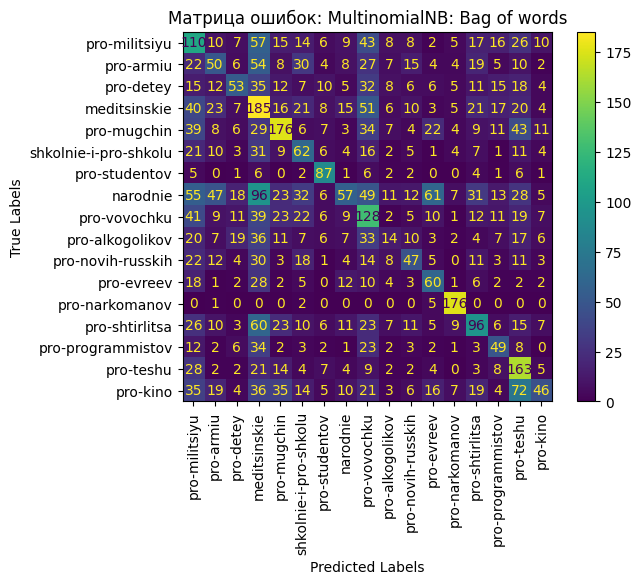

<Figure size 800x600 with 0 Axes>

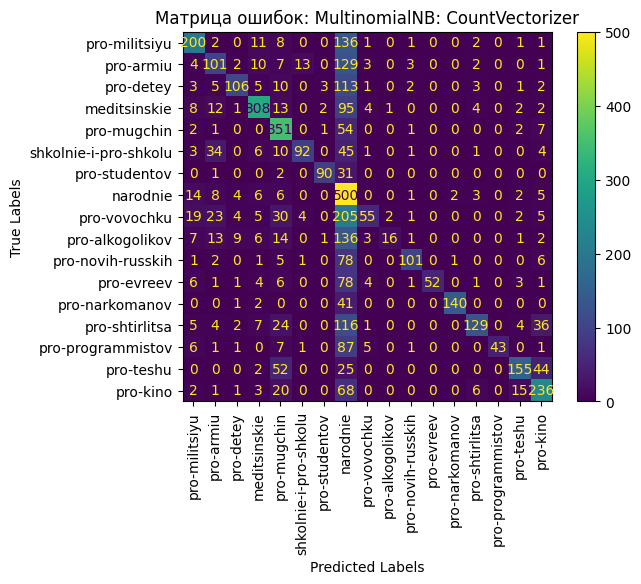

<Figure size 800x600 with 0 Axes>

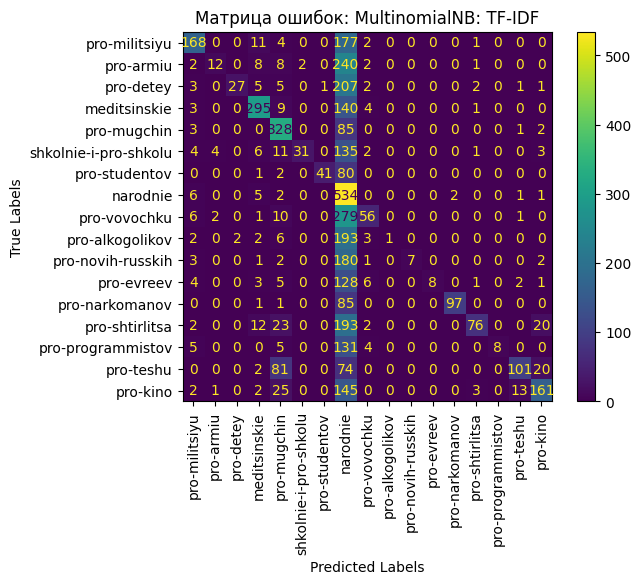

<Figure size 800x600 with 0 Axes>

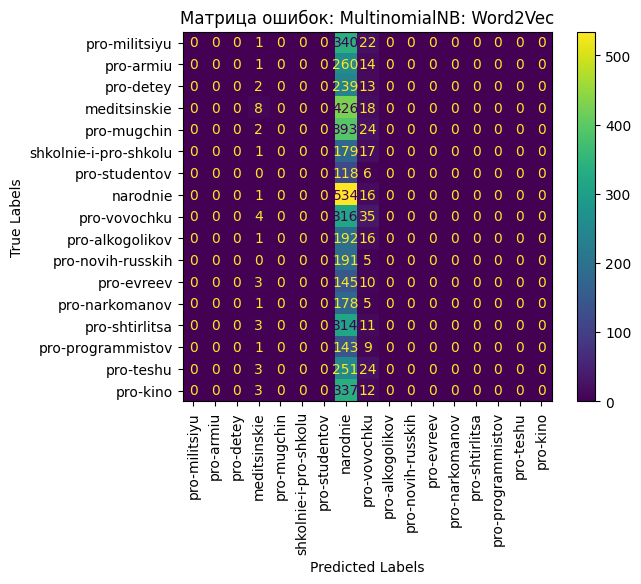

In [462]:
for vect_type, report in models.items():
    plot_model_report(report)

## Оценка точности:

In [463]:
for vect_name, report in models.items():
    print(vect_name)
    print_accuracy(report)

MultinomialNB: Bag of words
     Metrics  Model_imb
0   Accuracy   0.321576
1  Precision   0.330793
2     Recall   0.321576
3   F1-Score   0.304853
MultinomialNB: CountVectorizer
     Metrics  Model_imb
0   Accuracy   0.551774
1  Precision   0.718465
2     Recall   0.551774
3   F1-Score   0.557522
MultinomialNB: TF-IDF
     Metrics  Model_imb
0   Accuracy   0.402434
1  Precision   0.755412
2     Recall   0.402434
3   F1-Score   0.393763
MultinomialNB: Word2Vec
     Metrics  Model_imb
0   Accuracy   0.119018
1  Precision   0.044604
2     Recall   0.119018
3   F1-Score   0.035207


In [464]:
models = dict()

# Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи

## Bag Of Words

In [465]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
model_bow = make_pipeline(DictVectorizer(), SVC())
model_bow.fit(X_train_bag, y_train)
predictions = model_bow.predict(X_valid_bag)

judge_model(model_bow, predictions, y_valid, 'SVC: Bag of words', models)

/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.13      0.17      0.15       363
             narodnie       0.20      0.02      0.03       275
      pro-alkogolikov       0.43      0.11      0.17       254
            pro-armiu       0.23      0.29      0.26       452
            pro-detey       0.37      0.52      0.43       419
           pro-evreev       1.00      0.01      0.01       197
             pro-kino       0.81      0.24      0.37       124
        pro-militsiyu       0.22      0.57      0.32       551
          pro-mugchin       0.20      0.65      0.30       355
       pro-narkomanov       0.00      0.00      0.00       209
    pro-novih-russkih       0.40      0.01      0.02       196
    pro-programmistov       1.00      0.02      0.04       158
       pro-shtirlitsa       0.83      0.68      0.75       184
        pro-studentov       0.57      0.04      0.07       328
            pro-teshu       0.0

/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Count Vectorizer

In [466]:
from sklearn.feature_extraction.text import CountVectorizer
model_cv = make_pipeline(CountVectorizer(), SVC())
model_cv.fit(X_train, y_train)
predictions = model_cv.predict(X_valid)

judge_model(model_cv, predictions, y_valid, 'SVC: CountVectorizer', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.65      0.55      0.59       363
             narodnie       0.54      0.25      0.34       275
      pro-alkogolikov       0.97      0.67      0.79       254
            pro-armiu       0.56      0.71      0.62       452
            pro-detey       0.93      0.83      0.88       419
           pro-evreev       0.89      0.65      0.75       197
             pro-kino       0.95      0.81      0.88       124
        pro-militsiyu       0.40      0.68      0.50       551
          pro-mugchin       0.34      0.77      0.47       355
       pro-narkomanov       0.69      0.21      0.32       209
    pro-novih-russkih       0.83      0.64      0.72       196
    pro-programmistov       1.00      0.74      0.85       158
       pro-shtirlitsa       0.98      0.91      0.94       184
        pro-studentov       0.90      0.52      0.66       328
            pro-teshu       0.9

## TF-IDF

In [467]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), SVC())
model_tfidf.fit(X_train, y_train)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid, 'SVC: TF-IDF', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.74      0.61      0.67       363
             narodnie       0.61      0.34      0.44       275
      pro-alkogolikov       0.95      0.74      0.83       254
            pro-armiu       0.81      0.72      0.76       452
            pro-detey       0.91      0.89      0.90       419
           pro-evreev       0.89      0.74      0.81       197
             pro-kino       0.95      0.85      0.90       124
        pro-militsiyu       0.40      0.84      0.54       551
          pro-mugchin       0.45      0.67      0.54       355
       pro-narkomanov       0.75      0.22      0.33       209
    pro-novih-russkih       0.86      0.78      0.82       196
    pro-programmistov       1.00      0.75      0.86       158
       pro-shtirlitsa       0.98      0.93      0.95       184
        pro-studentov       0.87      0.61      0.72       328
            pro-teshu       0.9

## HashingVectorizer

In [468]:
from sklearn.feature_extraction.text import HashingVectorizer
model_hashing = make_pipeline(HashingVectorizer(), SVC())
model_hashing.fit(X_train, y_train)
predictions = model_hashing.predict(X_valid)

judge_model(model_hashing, predictions, y_valid, 'SVC: HashingVectorizer', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.67      0.60      0.63       363
             narodnie       0.55      0.34      0.42       275
      pro-alkogolikov       0.94      0.71      0.81       254
            pro-armiu       0.70      0.73      0.72       452
            pro-detey       0.91      0.86      0.88       419
           pro-evreev       0.89      0.73      0.80       197
             pro-kino       0.95      0.85      0.90       124
        pro-militsiyu       0.42      0.78      0.55       551
          pro-mugchin       0.40      0.70      0.51       355
       pro-narkomanov       0.63      0.21      0.32       209
    pro-novih-russkih       0.85      0.73      0.79       196
    pro-programmistov       1.00      0.70      0.82       158
       pro-shtirlitsa       0.98      0.92      0.95       184
        pro-studentov       0.90      0.58      0.71       328
            pro-teshu       0.9

## Word2Vec

In [469]:
model_w2v = SVC()
model_w2v.fit(X_w2v_train, y_train)
predictions = model_w2v.predict(X_w2v_test)

judge_model(model_w2v, predictions, y_valid, 'SVC: Word2Vec', models)

/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.13      0.15      0.14       363
             narodnie       0.19      0.02      0.03       275
      pro-alkogolikov       0.00      0.00      0.00       254
            pro-armiu       0.15      0.09      0.11       452
            pro-detey       0.17      0.11      0.14       419
           pro-evreev       0.00      0.00      0.00       197
             pro-kino       0.00      0.00      0.00       124
        pro-militsiyu       0.14      0.66      0.23       551
          pro-mugchin       0.13      0.27      0.18       355
       pro-narkomanov       0.00      0.00      0.00       209
    pro-novih-russkih       0.00      0.00      0.00       196
    pro-programmistov       0.50      0.02      0.04       158
       pro-shtirlitsa       0.10      0.10      0.10       184
        pro-studentov       0.00      0.00      0.00       328
            pro-teshu       0.0

/home/thego/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Вывод матрицы ошибок:

<Figure size 800x600 with 0 Axes>

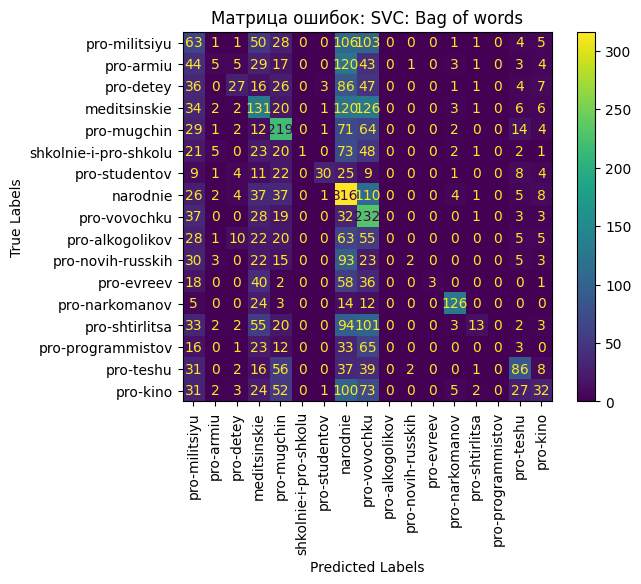

<Figure size 800x600 with 0 Axes>

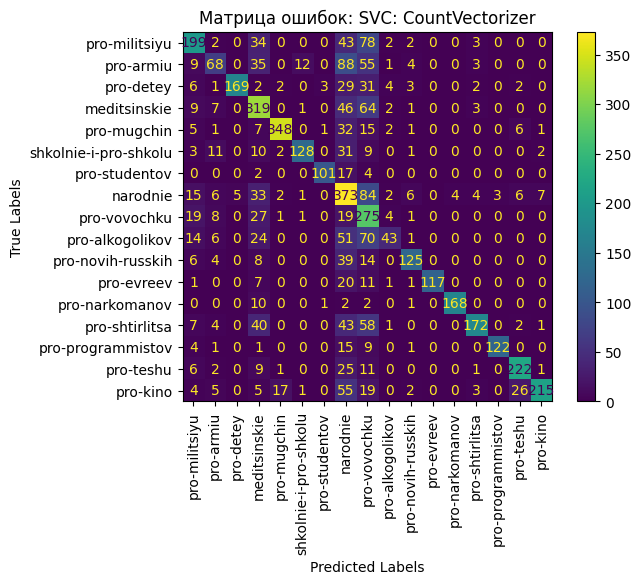

<Figure size 800x600 with 0 Axes>

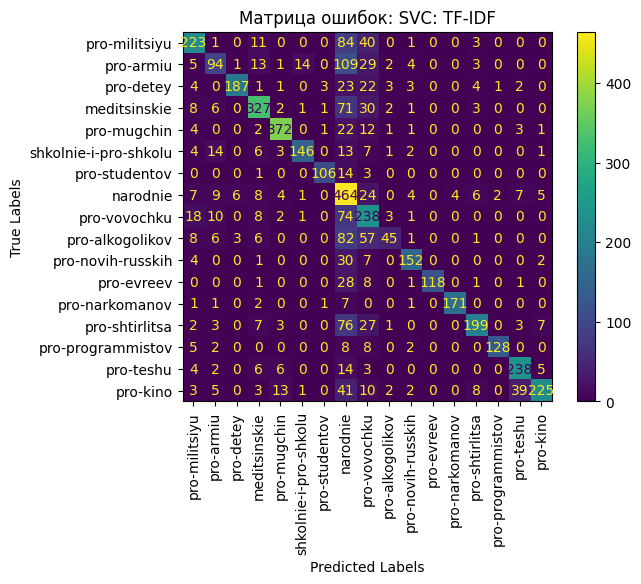

<Figure size 800x600 with 0 Axes>

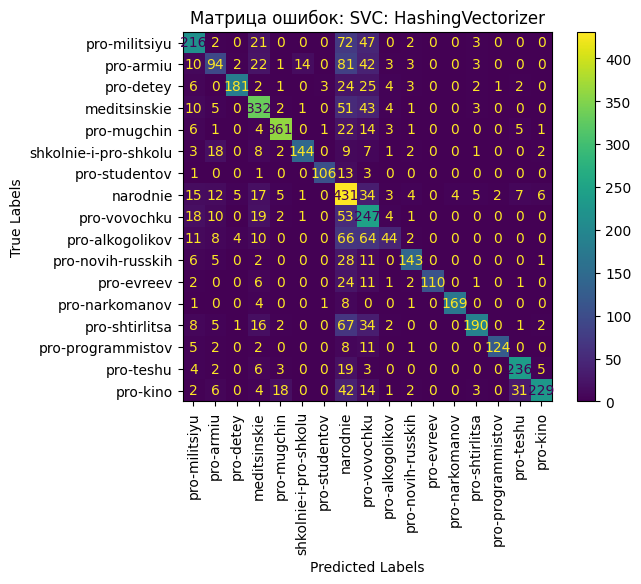

<Figure size 800x600 with 0 Axes>

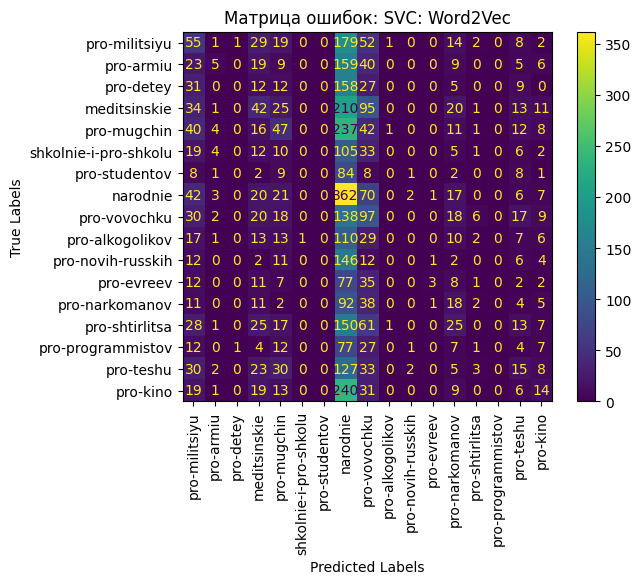

In [470]:
for vect_type, report in models.items():
    plot_model_report(report)

## Оценка точности:

In [471]:
for vect_name, report in models.items():
    print(vect_name)
    print_accuracy(report)

SVC: Bag of words
     Metrics  Model_imb
0   Accuracy   0.265264
1  Precision   0.369164
2     Recall   0.265264
3   F1-Score   0.219249
SVC: CountVectorizer
     Metrics  Model_imb
0   Accuracy   0.652640
1  Precision   0.735611
2     Recall   0.652640
3   F1-Score   0.663860
SVC: TF-IDF
     Metrics  Model_imb
0   Accuracy   0.708127
1  Precision   0.773731
2     Recall   0.708127
3   F1-Score   0.715799
SVC: HashingVectorizer
     Metrics  Model_imb
0   Accuracy   0.692450
1  Precision   0.750901
2     Recall   0.692450
3   F1-Score   0.699908
SVC: Word2Vec
     Metrics  Model_imb
0   Accuracy   0.135726
1  Precision   0.111007
2     Recall   0.135726
3   F1-Score   0.087069


In [472]:
models = dict()

# Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

## Bag Of Words

In [17]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
model_bow = make_pipeline(DictVectorizer(), DecisionTreeClassifier())
model_bow.fit(X_train_bag, y_train)
predictions = model_bow.predict(X_valid_bag)

judge_model(model_bow, predictions, y_valid, 'DecisionTreeClassifier: Bag of words', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.16      0.17      0.16       363
             narodnie       0.14      0.13      0.14       275
      pro-alkogolikov       0.19      0.15      0.17       254
            pro-armiu       0.22      0.25      0.23       452
            pro-detey       0.27      0.26      0.27       419
           pro-evreev       0.13      0.13      0.13       197
             pro-kino       0.47      0.50      0.49       124
        pro-militsiyu       0.22      0.22      0.22       551
          pro-mugchin       0.18      0.20      0.19       355
       pro-narkomanov       0.12      0.11      0.12       209
    pro-novih-russkih       0.09      0.09      0.09       196
    pro-programmistov       0.20      0.20      0.20       158
       pro-shtirlitsa       0.89      0.91      0.90       184
        pro-studentov       0.21      0.19      0.20       328
            pro-teshu       0.2

## CountVectorizer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
model_cv = make_pipeline(CountVectorizer(), DecisionTreeClassifier())
model_cv.fit(X_train, y_train)
predictions = model_cv.predict(X_valid)

judge_model(model_cv, predictions, y_valid, 'DecisionTreeClassifier: CountVectorizer', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.56      0.60      0.58       363
             narodnie       0.43      0.39      0.41       275
      pro-alkogolikov       0.93      0.87      0.90       254
            pro-armiu       0.65      0.69      0.67       452
            pro-detey       0.96      0.95      0.96       419
           pro-evreev       0.82      0.82      0.82       197
             pro-kino       0.96      0.94      0.95       124
        pro-militsiyu       0.74      0.63      0.68       551
          pro-mugchin       0.37      0.57      0.45       355
       pro-narkomanov       0.39      0.31      0.35       209
    pro-novih-russkih       0.82      0.76      0.79       196
    pro-programmistov       0.98      0.94      0.96       158
       pro-shtirlitsa       0.98      0.96      0.97       184
        pro-studentov       0.69      0.66      0.67       328
            pro-teshu       0.9

## TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), DecisionTreeClassifier())
model_tfidf.fit(X_train, y_train)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid, 'DecisionTreeClassifier: TF-IDF', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.55      0.53      0.54       363
             narodnie       0.40      0.39      0.39       275
      pro-alkogolikov       0.91      0.87      0.89       254
            pro-armiu       0.66      0.68      0.67       452
            pro-detey       0.95      0.94      0.94       419
           pro-evreev       0.80      0.80      0.80       197
             pro-kino       0.95      0.94      0.95       124
        pro-militsiyu       0.70      0.62      0.66       551
          pro-mugchin       0.34      0.52      0.41       355
       pro-narkomanov       0.29      0.27      0.28       209
    pro-novih-russkih       0.80      0.77      0.78       196
    pro-programmistov       0.97      0.92      0.94       158
       pro-shtirlitsa       0.98      0.94      0.96       184
        pro-studentov       0.68      0.63      0.66       328
            pro-teshu       0.9

## HashingVectorizer

In [20]:
from sklearn.feature_extraction.text import HashingVectorizer
model_hashing = make_pipeline(HashingVectorizer(), DecisionTreeClassifier())
model_hashing.fit(X_train, y_train)
predictions = model_hashing.predict(X_valid)

judge_model(model_hashing, predictions, y_valid, 'DecisionTreeClassifier: HashingVectorizer', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.54      0.60      0.57       363
             narodnie       0.40      0.40      0.40       275
      pro-alkogolikov       0.93      0.87      0.90       254
            pro-armiu       0.64      0.70      0.67       452
            pro-detey       0.97      0.94      0.95       419
           pro-evreev       0.81      0.82      0.81       197
             pro-kino       0.97      0.94      0.96       124
        pro-militsiyu       0.68      0.62      0.65       551
          pro-mugchin       0.40      0.52      0.45       355
       pro-narkomanov       0.35      0.30      0.32       209
    pro-novih-russkih       0.79      0.76      0.77       196
    pro-programmistov       0.92      0.93      0.93       158
       pro-shtirlitsa       0.96      0.94      0.95       184
        pro-studentov       0.69      0.63      0.66       328
            pro-teshu       0.9

## Word2Vec

In [21]:
model_w2v = DecisionTreeClassifier()
model_w2v.fit(X_w2v_train, y_train)
predictions = model_w2v.predict(X_w2v_test)

judge_model(model_w2v, predictions, y_valid, 'DecisionTreeClassifier: Word2Vec', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.10      0.16      0.12       363
             narodnie       0.05      0.05      0.05       275
      pro-alkogolikov       0.10      0.07      0.08       254
            pro-armiu       0.13      0.22      0.16       452
            pro-detey       0.13      0.11      0.12       419
           pro-evreev       0.08      0.05      0.06       197
             pro-kino       0.17      0.12      0.14       124
        pro-militsiyu       0.14      0.13      0.13       551
          pro-mugchin       0.13      0.32      0.19       355
       pro-narkomanov       0.10      0.05      0.07       209
    pro-novih-russkih       0.10      0.06      0.08       196
    pro-programmistov       0.22      0.08      0.12       158
       pro-shtirlitsa       0.11      0.20      0.14       184
        pro-studentov       0.07      0.03      0.04       328
            pro-teshu       0.1

## Вывод матрицы ошибок:

<Figure size 800x600 with 0 Axes>

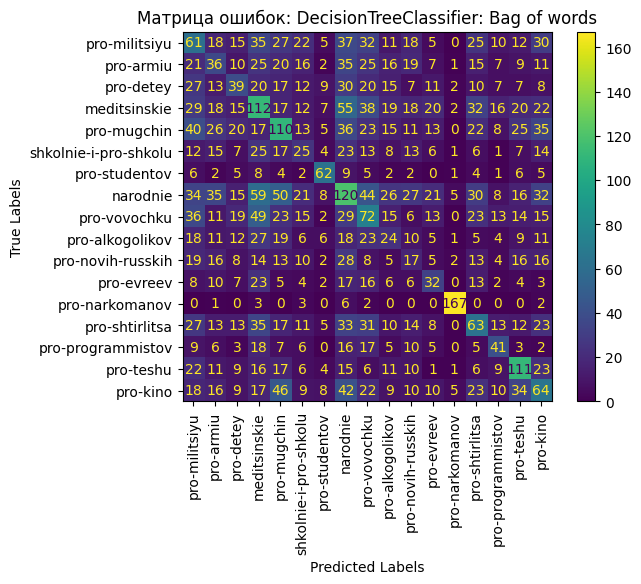

<Figure size 800x600 with 0 Axes>

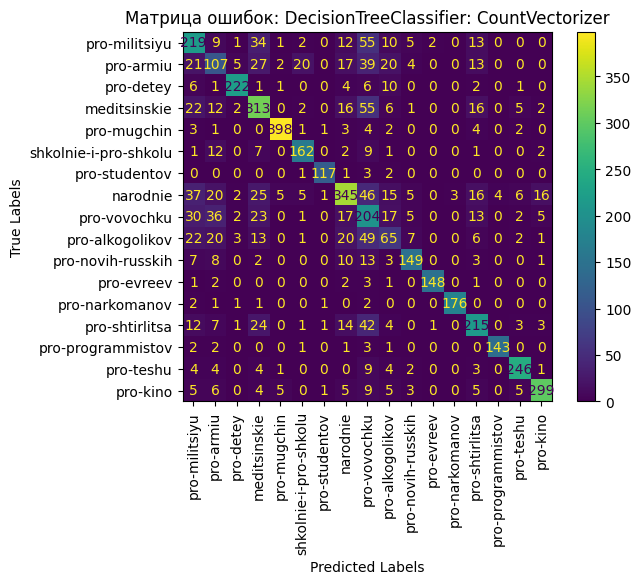

<Figure size 800x600 with 0 Axes>

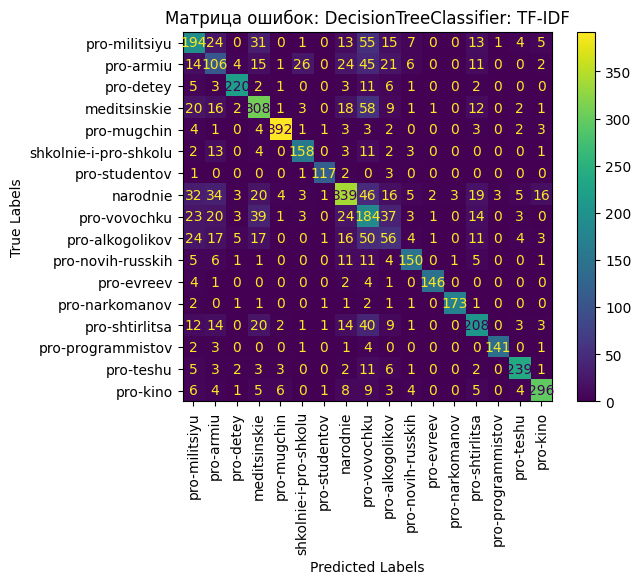

<Figure size 800x600 with 0 Axes>

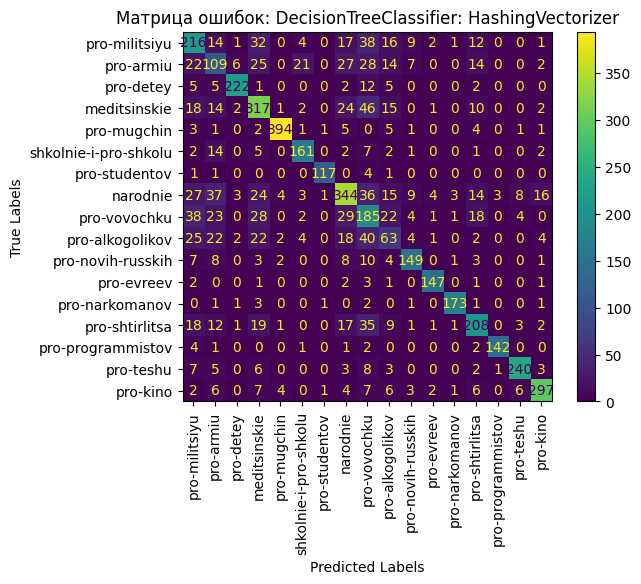

<Figure size 800x600 with 0 Axes>

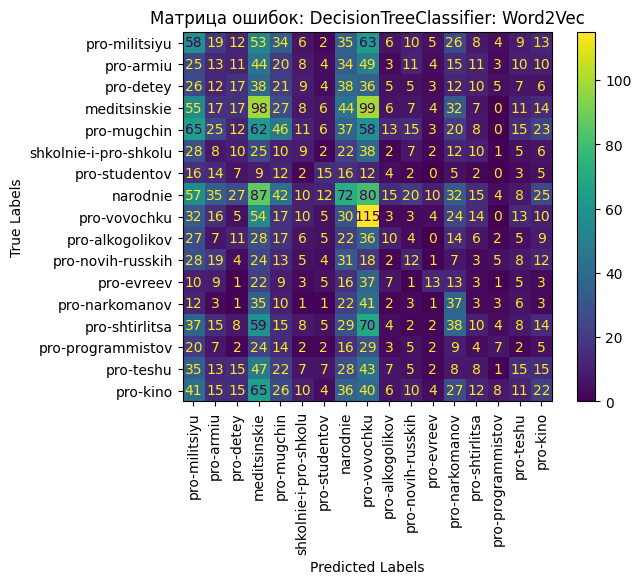

In [22]:
for vect_type, report in models.items():
    plot_model_report(report)

## Оценка точности:

In [23]:
for vect_name, report in models.items():
    print(vect_name)
    print_accuracy(report)

DecisionTreeClassifier: Bag of words
     Metrics  Model_imb
0   Accuracy   0.238449
1  Precision   0.236433
2     Recall   0.238449
3   F1-Score   0.237068
DecisionTreeClassifier: CountVectorizer
     Metrics  Model_imb
0   Accuracy   0.727723
1  Precision   0.742304
2     Recall   0.727723
3   F1-Score   0.732271
DecisionTreeClassifier: TF-IDF
     Metrics  Model_imb
0   Accuracy   0.706889
1  Precision   0.722315
2     Recall   0.706889
3   F1-Score   0.712611
DecisionTreeClassifier: HashingVectorizer
     Metrics  Model_imb
0   Accuracy   0.718647
1  Precision   0.728197
2     Recall   0.718647
3   F1-Score   0.722112
DecisionTreeClassifier: Word2Vec
     Metrics  Model_imb
0   Accuracy   0.117368
1  Precision   0.115030
2     Recall   0.117368
3   F1-Score   0.106650


In [24]:
models = dict()

# Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

## Bag Of Words

In [25]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
model_bow = make_pipeline(DictVectorizer(), RandomForestClassifier())
model_bow.fit(X_train_bag, y_train)
predictions = model_bow.predict(X_valid_bag)

judge_model(model_bow, predictions, y_valid, 'RandomForestClassifier: Bag of words', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.19      0.26      0.22       363
             narodnie       0.36      0.12      0.18       275
      pro-alkogolikov       0.55      0.21      0.31       254
            pro-armiu       0.33      0.41      0.36       452
            pro-detey       0.42      0.58      0.49       419
           pro-evreev       0.46      0.08      0.14       197
             pro-kino       0.75      0.72      0.74       124
        pro-militsiyu       0.27      0.60      0.37       551
          pro-mugchin       0.29      0.48      0.36       355
       pro-narkomanov       0.88      0.07      0.12       209
    pro-novih-russkih       0.41      0.13      0.19       196
    pro-programmistov       0.77      0.35      0.48       158
       pro-shtirlitsa       0.82      0.97      0.89       184
        pro-studentov       0.55      0.21      0.31       328
            pro-teshu       0.6

## CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
model_cv = make_pipeline(CountVectorizer(), RandomForestClassifier())
model_cv.fit(X_train, y_train)
predictions = model_cv.predict(X_valid)

judge_model(model_cv, predictions, y_valid, 'RandomForestClassifier: CountVectorizer', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.70      0.65      0.67       363
             narodnie       0.69      0.34      0.46       275
      pro-alkogolikov       0.89      0.83      0.86       254
            pro-armiu       0.66      0.78      0.71       452
            pro-detey       0.89      0.96      0.92       419
           pro-evreev       0.85      0.81      0.83       197
             pro-kino       0.91      0.95      0.93       124
        pro-militsiyu       0.82      0.66      0.73       551
          pro-mugchin       0.37      0.81      0.51       355
       pro-narkomanov       0.67      0.24      0.35       209
    pro-novih-russkih       0.73      0.82      0.77       196
    pro-programmistov       1.00      0.91      0.95       158
       pro-shtirlitsa       0.96      0.98      0.97       184
        pro-studentov       0.87      0.65      0.74       328
            pro-teshu       0.9

## TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model_tfidf.fit(X_train, y_train)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid, 'RandomForestClassifier: TF-IDF', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.68      0.64      0.66       363
             narodnie       0.69      0.36      0.47       275
      pro-alkogolikov       0.90      0.84      0.87       254
            pro-armiu       0.70      0.77      0.73       452
            pro-detey       0.89      0.95      0.92       419
           pro-evreev       0.85      0.85      0.85       197
             pro-kino       0.91      0.95      0.93       124
        pro-militsiyu       0.74      0.69      0.72       551
          pro-mugchin       0.39      0.79      0.52       355
       pro-narkomanov       0.76      0.24      0.37       209
    pro-novih-russkih       0.76      0.83      0.79       196
    pro-programmistov       1.00      0.89      0.94       158
       pro-shtirlitsa       0.97      0.98      0.98       184
        pro-studentov       0.86      0.69      0.77       328
            pro-teshu       0.9

## Word2Vec

In [29]:
model_w2v = RandomForestClassifier()
model_w2v.fit(X_w2v_train, y_train)
predictions = model_w2v.predict(X_w2v_test)

judge_model(model_w2v, predictions, y_valid, 'RandomForestClassifier: Word2Vec', models)

Classification Report:
                       precision    recall  f1-score   support

         meditsinskie       0.11      0.13      0.12       363
             narodnie       0.09      0.05      0.06       275
      pro-alkogolikov       0.14      0.05      0.07       254
            pro-armiu       0.14      0.20      0.16       452
            pro-detey       0.13      0.12      0.12       419
           pro-evreev       0.08      0.04      0.05       197
             pro-kino       0.26      0.13      0.17       124
        pro-militsiyu       0.16      0.29      0.21       551
          pro-mugchin       0.13      0.33      0.19       355
       pro-narkomanov       0.22      0.07      0.10       209
    pro-novih-russkih       0.09      0.04      0.06       196
    pro-programmistov       0.36      0.11      0.17       158
       pro-shtirlitsa       0.13      0.23      0.17       184
        pro-studentov       0.04      0.02      0.02       328
            pro-teshu       0.2

## Вывод матрицы ошибок:

<Figure size 800x600 with 0 Axes>

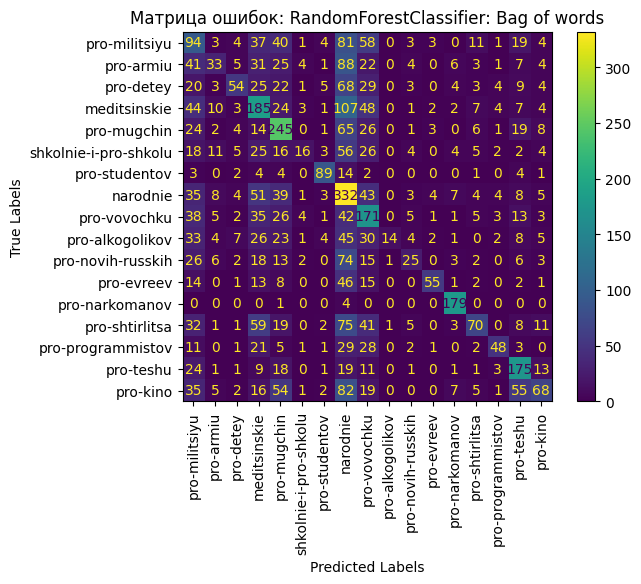

<Figure size 800x600 with 0 Axes>

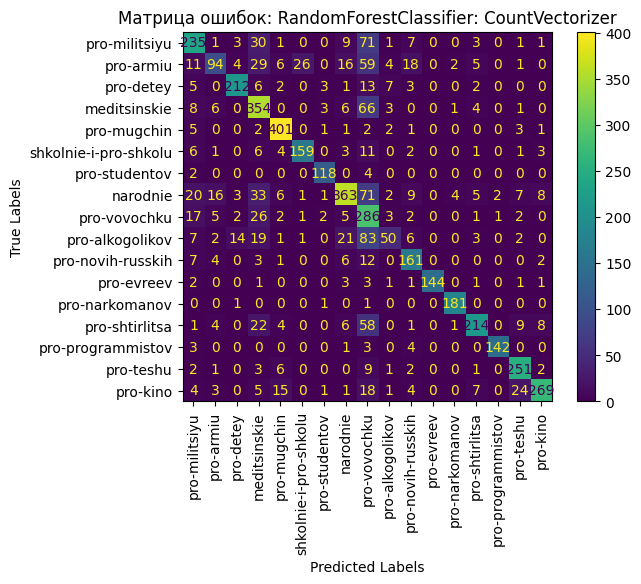

<Figure size 800x600 with 0 Axes>

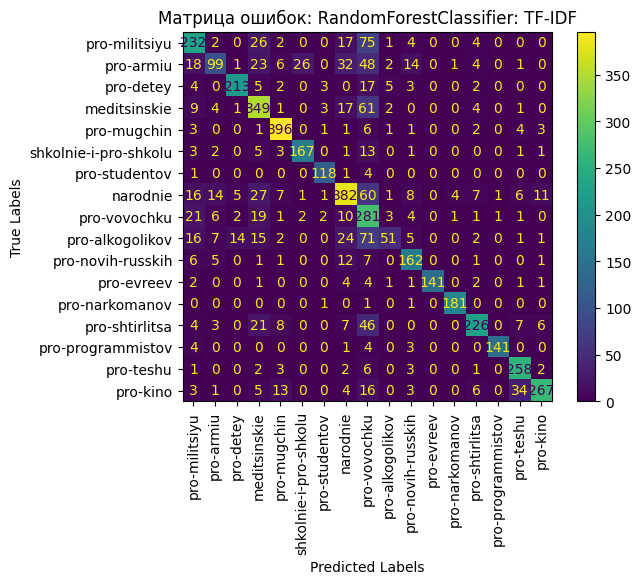

<Figure size 800x600 with 0 Axes>

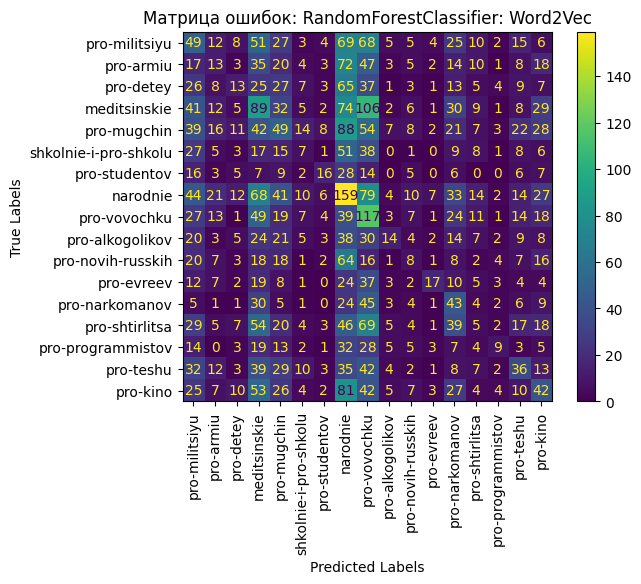

In [30]:
for vect_type, report in models.items():
    plot_model_report(report)

## Оценка точности:

In [31]:
for vect_name, report in models.items():
    print(vect_name)
    print_accuracy(report)

RandomForestClassifier: Bag of words
     Metrics  Model_imb
0   Accuracy   0.382219
1  Precision   0.453465
2     Recall   0.382219
3   F1-Score   0.361501
RandomForestClassifier: CountVectorizer
     Metrics  Model_imb
0   Accuracy   0.749587
1  Precision   0.784830
2     Recall   0.749587
3   F1-Score   0.750153
RandomForestClassifier: TF-IDF
     Metrics  Model_imb
0   Accuracy   0.755776
1  Precision   0.785593
2     Recall   0.755776
3   F1-Score   0.754983
RandomForestClassifier: Word2Vec
     Metrics  Model_imb
0   Accuracy   0.141502
1  Precision   0.144413
2     Recall   0.141502
3   F1-Score   0.127778


In [22]:
models = dict()

# Задание 5. Обучите модели машинного обучения для решения задачи классификации текстов, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравните их точность и быстродействие.

In [23]:
!pip install catboost lightgbm xgboost

In [24]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

## 5.1. CatBoost

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), CatBoostClassifier())
model_tfidf.fit(X_train, y_train_encoded)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid_encoded, 'LightGBM', models)

Learning rate set to 0.092043
0:	learn: 2.5766136	total: 2.59s	remaining: 43m 5s
1:	learn: 2.4610266	total: 5.13s	remaining: 42m 38s
2:	learn: 2.3670985	total: 7.65s	remaining: 42m 22s
3:	learn: 2.3048915	total: 10.2s	remaining: 42m 14s
4:	learn: 2.2408149	total: 12.7s	remaining: 42m 5s
5:	learn: 2.1935169	total: 15.2s	remaining: 42m 6s
6:	learn: 2.1277850	total: 17.8s	remaining: 42m 2s
7:	learn: 2.0900069	total: 20.3s	remaining: 41m 56s
8:	learn: 2.0447212	total: 22.8s	remaining: 41m 54s
9:	learn: 2.0154936	total: 25.4s	remaining: 41m 50s
10:	learn: 1.9832561	total: 27.9s	remaining: 41m 48s
11:	learn: 1.9583761	total: 30.4s	remaining: 41m 46s
12:	learn: 1.9358309	total: 33s	remaining: 41m 43s
13:	learn: 1.9185336	total: 35.5s	remaining: 41m 39s
14:	learn: 1.8932920	total: 38s	remaining: 41m 36s
15:	learn: 1.8698164	total: 40.5s	remaining: 41m 33s
16:	learn: 1.8517822	total: 43.1s	remaining: 41m 30s
17:	learn: 1.8339752	total: 45.6s	remaining: 41m 27s
18:	learn: 1.8149295	total: 48.1s	

## 5.2. Light GBM

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), LGBMClassifier())
model_tfidf.fit(X_train, y_train_encoded)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid_encoded, 'LightGBM', models)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.178245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103487
[LightGBM] [Info] Number of data points in the train set: 19390, number of used features: 3377
[LightGBM] [Info] Start training from score -2.478020
[LightGBM] [Info] Start training from score -2.811178
[LightGBM] [Info] Start training from score -3.076807
[LightGBM] [Info] Start training from score -2.367020
[LightGBM] [Info] Start training from score -2.447751
[LightGBM] [Info] Start training from score -3.148680
[LightGBM] [Info] Start training from score -3.667955
[LightGBM] [Info] Start training from score -2.124916
[LightGBM] [Info] Start training from score -2.530381
[LightGBM] [Info] Start training from score -3.219650
[LightGBM] [Info] Start training from score -3.137921
[LightGBM] [Info] Start training from score -3.47

## 5.3. XGBoost

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), XGBClassifier())
model_tfidf.fit(X_train, y_train_encoded)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid_encoded, 'XGBoost', models)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       363
           1       0.58      0.50      0.54       275
           2       0.96      0.91      0.94       254
           3       0.77      0.75      0.76       452
           4       0.97      0.97      0.97       419
           5       0.86      0.82      0.84       197
           6       0.97      0.94      0.96       124
           7       0.81      0.68      0.74       551
           8       0.41      0.79      0.54       355
           9       0.62      0.44      0.51       209
          10       0.91      0.88      0.89       196
          11       1.00      0.95      0.97       158
          12       0.98      0.97      0.98       184
          13       0.86      0.69      0.76       328
          14       0.97      0.98      0.98       153
          15       0.95      0.91      0.93       278
          16       0.95      0.91      0.93       352

   

## 5.3. AdaBoost

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
model_tfidf = make_pipeline(TfidfVectorizer(), AdaBoostClassifier())
model_tfidf.fit(X_train, y_train_encoded)
predictions = model_tfidf.predict(X_valid)

judge_model(model_tfidf, predictions, y_valid_encoded, 'AdaBoost', models)

Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.05      0.08       363
           1       0.00      0.00      0.00       275
           2       0.97      0.71      0.82       254
           3       0.00      0.00      0.00       452
           4       0.90      0.84      0.87       419
           5       0.93      0.65      0.77       197
           6       0.96      0.90      0.93       124
           7       0.16      0.90      0.27       551
           8       0.30      0.02      0.04       355
           9       0.00      0.00      0.00       209
          10       0.00      0.00      0.00       196
          11       0.92      0.44      0.60       158
          12       0.97      0.92      0.95       184
          13       0.00      0.00      0.00       328
          14       0.96      0.84      0.90       153
          15       0.74      0.81      0.77       278
          16       0.19      0.01      0.02       352

   

/home/thego/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/miniconda3/envs/tf/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/thego/minic

# Подведите общие итоги

<Figure size 800x600 with 0 Axes>

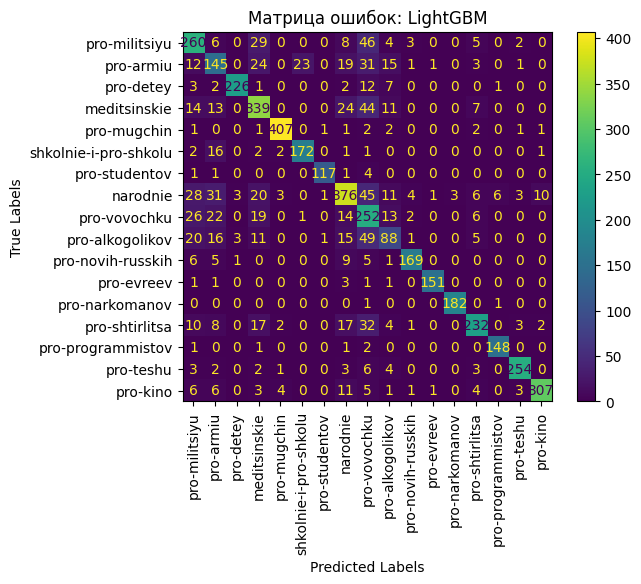

<Figure size 800x600 with 0 Axes>

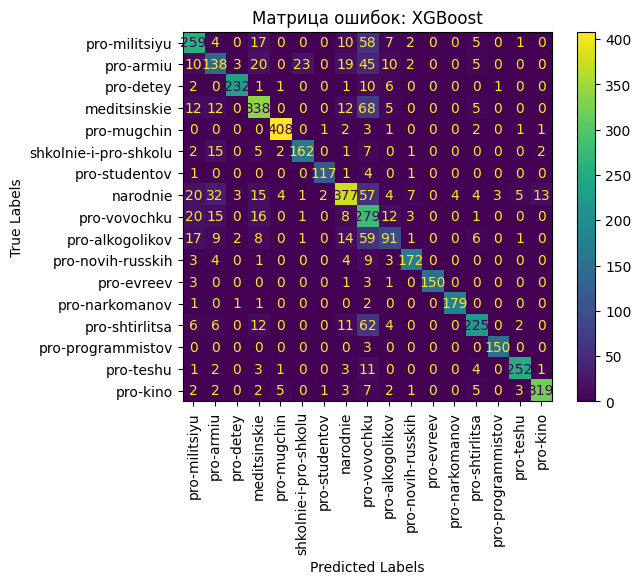

<Figure size 800x600 with 0 Axes>

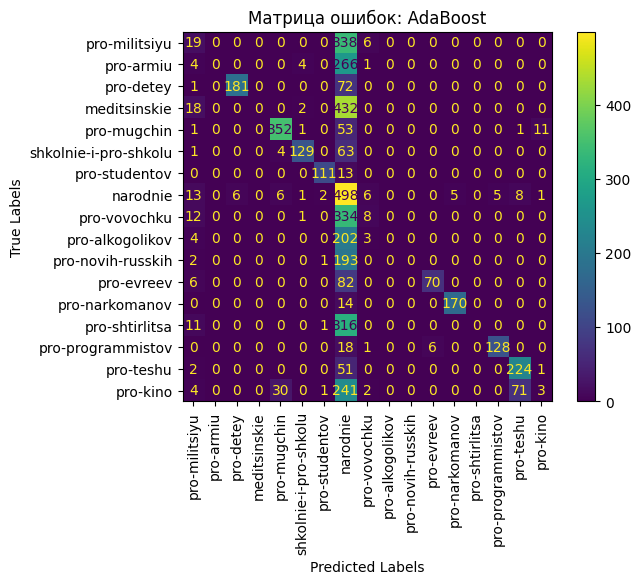

In [30]:
for vect_type, report in models.items():
    plot_model_report(report)

In [31]:
for vect_name, report in models.items():
    print(vect_name)
    print_accuracy(report)

LightGBM
     Metrics  Model_imb
0   Accuracy   0.788985
1  Precision   0.802793
2     Recall   0.788985
3   F1-Score   0.792721
XGBoost
     Metrics  Model_imb
0   Accuracy   0.793729
1  Precision   0.819478
2     Recall   0.793729
3   F1-Score   0.799902
AdaBoost
     Metrics  Model_imb
0   Accuracy   0.390470
1  Precision   0.397886
2     Recall   0.390470
3   F1-Score   0.341534
